In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
coordinates

[(-78.77745120407268, 91.36883918536387),
 (-26.563718583073026, -24.97493260384846),
 (-71.60248611669755, -39.726389686832704),
 (17.423234426450364, -93.44164552126576),
 (-77.91554163135083, 170.01753551002548),
 (-78.66295995081066, -97.19879540265913),
 (-77.11847944056083, -6.898887147755033),
 (53.83181792492951, -84.23386859754388),
 (-45.732196476638876, 143.3030149904136),
 (-48.875973512141485, -56.77626891831147),
 (-20.933779782209626, 24.88001466836002),
 (-59.32063485961882, -62.9209272544832),
 (-3.2893290576717362, -79.56095204327988),
 (-74.75811110839723, 55.8542763468804),
 (27.202137108114016, 70.36421113313494),
 (50.65520756719951, 143.99831213218846),
 (-20.71005988284486, -33.23505039641998),
 (-83.96096921289138, -25.021074283888083),
 (-33.56650091265877, 21.755288349871762),
 (68.62906357142674, -70.39918631762225),
 (80.91876824702169, -17.94387441256339),
 (29.790273270568804, 170.84044133213462),
 (71.97330081406639, 154.1182320443553),
 (-32.88904316543

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

629

In [7]:
cities

['busselton',
 'vila velha',
 'ushuaia',
 'ostuacan',
 'bluff',
 'punta arenas',
 'hermanus',
 'attawapiskat',
 'new norfolk',
 'rawson',
 'mopipi',
 'pasaje',
 'east london',
 'jaisalmer',
 'katangli',
 'caravelas',
 'oudtshoorn',
 'clyde river',
 'illoqqortoormiut',
 'severo-kurilsk',
 'srednekolymsk',
 'rikitea',
 'gunjur',
 'ancud',
 'mataura',
 'hilo',
 'angoram',
 'ambilobe',
 'sao filipe',
 'pundaguitan',
 'cape town',
 'luohe',
 'alofi',
 'saint george',
 'barentsburg',
 'khandyga',
 'carnarvon',
 'inhambane',
 'kirakira',
 'lagoa',
 'longlac',
 'amderma',
 'jamestown',
 'thompson',
 'albany',
 'luderitz',
 'hervey bay',
 'kholm',
 'bukachacha',
 'vaini',
 'bengkulu',
 'ribeira grande',
 'arraial do cabo',
 'puebloviejo',
 'gurskoye',
 'mutoko',
 'palmares do sul',
 'lamu',
 'saleaula',
 'atuona',
 'kloulklubed',
 'talara',
 'mount gambier',
 'dikson',
 'mogadishu',
 'mantua',
 'hithadhoo',
 'faridan',
 'mokhotlong',
 'hobart',
 'quelimane',
 'kapaa',
 'tautira',
 'cherskiy',
 

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [10]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [15]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | busselton
Processing Record 2 of Set 1 | vila velha
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | ostuacan
Processing Record 5 of Set 1 | bluff
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | hermanus
Processing Record 8 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 9 of Set 1 | new norfolk
Processing Record 10 of Set 1 | rawson
Processing Record 11 of Set 1 | mopipi
Processing Record 12 of Set 1 | pasaje
Processing Record 13 of Set 1 | east london
Processing Record 14 of Set 1 | jaisalmer
Processing Record 15 of Set 1 | katangli
Processing Record 16 of Set 1 | caravelas
Processing Record 17 of Set 1 | oudtshoorn
Processing Record 18 of Set 1 | clyde river
Processing Record 19 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 20 of Set 1 | severo-kurilsk
Processing Record 21 of Set 1 | srednekolymsk

Processing Record 39 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 40 of Set 4 | prince rupert
Processing Record 41 of Set 4 | rio gallegos
Processing Record 42 of Set 4 | bolungarvik
City not found. Skipping...
Processing Record 43 of Set 4 | namibe
Processing Record 44 of Set 4 | tuktoyaktuk
Processing Record 45 of Set 4 | bandarbeyla
Processing Record 46 of Set 4 | suntar
Processing Record 47 of Set 4 | gao
Processing Record 48 of Set 4 | utiroa
City not found. Skipping...
Processing Record 49 of Set 4 | los llanos de aridane
Processing Record 50 of Set 4 | hofn
Processing Record 1 of Set 5 | pinawa
Processing Record 2 of Set 5 | tuatapere
Processing Record 3 of Set 5 | taitung
Processing Record 4 of Set 5 | yeletskiy
City not found. Skipping...
Processing Record 5 of Set 5 | kathmandu
Processing Record 6 of Set 5 | pangnirtung
Processing Record 7 of Set 5 | sand
Processing Record 8 of Set 5 | sayyan
Processing Record 9 of Set 5 | adrar
Processing R

Processing Record 23 of Set 8 | tete
Processing Record 24 of Set 8 | nipawin
Processing Record 25 of Set 8 | havoysund
Processing Record 26 of Set 8 | yarada
Processing Record 27 of Set 8 | mirnyy
Processing Record 28 of Set 8 | flinders
Processing Record 29 of Set 8 | bafoulabe
Processing Record 30 of Set 8 | aflu
City not found. Skipping...
Processing Record 31 of Set 8 | soure
Processing Record 32 of Set 8 | ode
Processing Record 33 of Set 8 | barcelona
Processing Record 34 of Set 8 | namatanai
Processing Record 35 of Set 8 | umm durman
City not found. Skipping...
Processing Record 36 of Set 8 | syava
Processing Record 37 of Set 8 | daru
Processing Record 38 of Set 8 | karauzyak
City not found. Skipping...
Processing Record 39 of Set 8 | matay
Processing Record 40 of Set 8 | betsiamites
Processing Record 41 of Set 8 | villa sandino
Processing Record 42 of Set 8 | xinyang
Processing Record 43 of Set 8 | eurajoki
Processing Record 44 of Set 8 | mount isa
Processing Record 45 of Set 8 

Processing Record 8 of Set 12 | conway
Processing Record 9 of Set 12 | sucre
Processing Record 10 of Set 12 | tura
Processing Record 11 of Set 12 | gimli
Processing Record 12 of Set 12 | mayo
Processing Record 13 of Set 12 | kununurra
Processing Record 14 of Set 12 | rocha
Processing Record 15 of Set 12 | boa vista
Processing Record 16 of Set 12 | axim
Processing Record 17 of Set 12 | gravdal
Processing Record 18 of Set 12 | la ronge
Processing Record 19 of Set 12 | prykolotne
Processing Record 20 of Set 12 | asyut
Processing Record 21 of Set 12 | itacare
Processing Record 22 of Set 12 | poronaysk
Processing Record 23 of Set 12 | zhanaozen
Processing Record 24 of Set 12 | voi
Processing Record 25 of Set 12 | bodmin
Processing Record 26 of Set 12 | samalaeulu
City not found. Skipping...
Processing Record 27 of Set 12 | manta
Processing Record 28 of Set 12 | aybak
City not found. Skipping...
Processing Record 29 of Set 12 | ambon
Processing Record 30 of Set 12 | killybegs
Processing Reco

In [21]:
len(city_data)

574

In [22]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.6500,115.3333,53.10,73,97,16.35,AU,2021-11-08 18:00:26
1,Vila Velha,-20.3297,-40.2925,75.94,85,81,1.99,BR,2021-11-08 18:00:27
2,Ushuaia,-54.8000,-68.3000,50.20,67,87,6.60,AR,2021-11-08 18:00:27
3,Ostuacan,17.4167,-93.3000,74.86,65,25,6.17,MX,2021-11-08 18:00:28
4,Bluff,-46.6000,168.3333,55.80,84,98,3.49,NZ,2021-11-08 18:00:28
5,Punta Arenas,-53.1500,-70.9167,53.11,46,98,14.50,CL,2021-11-08 18:00:23
6,Hermanus,-34.4187,19.2345,61.90,69,13,5.93,ZA,2021-11-08 18:00:29
7,New Norfolk,-42.7826,147.0587,49.50,72,30,1.99,AU,2021-11-08 18:00:29
8,Rawson,-43.3002,-65.1023,60.17,61,78,17.18,AR,2021-11-08 18:00:30
9,Mopipi,-21.1833,24.8833,87.10,30,93,11.12,BW,2021-11-08 18:00:30


In [23]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [25]:
city_data_df = city_data_df[new_column_order]

In [26]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Busselton,AU,2021-11-08 18:00:26,-33.6500,115.3333,53.10,73,97,16.35
1,Vila Velha,BR,2021-11-08 18:00:27,-20.3297,-40.2925,75.94,85,81,1.99
2,Ushuaia,AR,2021-11-08 18:00:27,-54.8000,-68.3000,50.20,67,87,6.60
3,Ostuacan,MX,2021-11-08 18:00:28,17.4167,-93.3000,74.86,65,25,6.17
4,Bluff,NZ,2021-11-08 18:00:28,-46.6000,168.3333,55.80,84,98,3.49
5,Punta Arenas,CL,2021-11-08 18:00:23,-53.1500,-70.9167,53.11,46,98,14.50
6,Hermanus,ZA,2021-11-08 18:00:29,-34.4187,19.2345,61.90,69,13,5.93
7,New Norfolk,AU,2021-11-08 18:00:29,-42.7826,147.0587,49.50,72,30,1.99
8,Rawson,AR,2021-11-08 18:00:30,-43.3002,-65.1023,60.17,61,78,17.18
9,Mopipi,BW,2021-11-08 18:00:30,-21.1833,24.8833,87.10,30,93,11.12


In [27]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [28]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [29]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1636397461.2089758

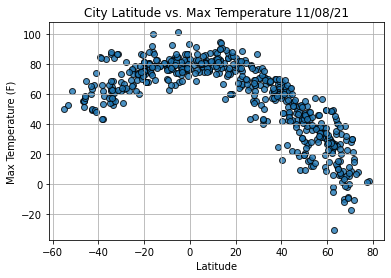

In [30]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

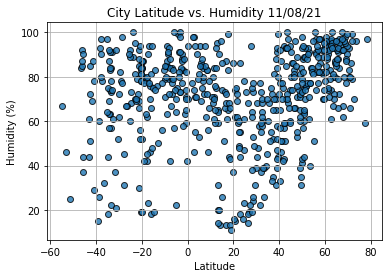

In [31]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

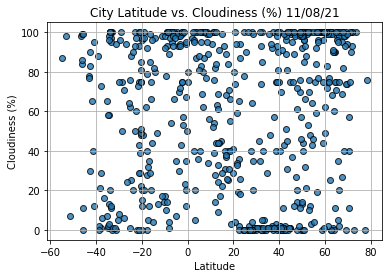

In [32]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

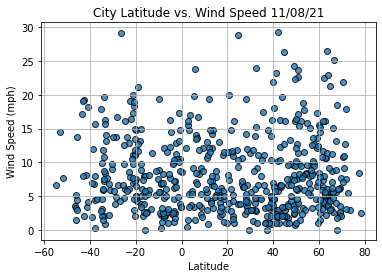

In [33]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [35]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [36]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
3,Ostuacan,MX,2021-11-08 18:00:28,17.4167,-93.3000,74.86,65,25,6.17
12,Jaisalmer,IN,2021-11-08 17:59:13,26.9147,70.9181,79.29,19,2,6.42
13,Katangli,RU,2021-11-08 18:00:32,51.7102,143.2326,26.31,76,88,7.85
16,Clyde River,CA,2021-11-08 18:00:33,70.4692,-68.5914,8.87,83,57,10.78
17,Severo-Kurilsk,RU,2021-11-08 18:00:34,50.6789,156.1250,36.34,64,96,22.70
...,...,...,...,...,...,...,...,...,...
566,Akureyri,IS,2021-11-08 18:04:25,65.6835,-18.0878,37.96,79,35,11.21
567,Magadan,RU,2021-11-08 18:04:25,59.5667,150.8000,8.58,74,1,7.07
570,Fojnica,BA,2021-11-08 18:04:27,43.9625,17.8983,41.92,97,100,3.33
571,San Joaquin,US,2021-11-08 18:04:27,37.9333,-121.3011,58.78,70,1,3.44


In [37]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
3,Ostuacan,MX,2021-11-08 18:00:28,17.4167,-93.3000,74.86,65,25,6.17
12,Jaisalmer,IN,2021-11-08 17:59:13,26.9147,70.9181,79.29,19,2,6.42
13,Katangli,RU,2021-11-08 18:00:32,51.7102,143.2326,26.31,76,88,7.85
16,Clyde River,CA,2021-11-08 18:00:33,70.4692,-68.5914,8.87,83,57,10.78
17,Severo-Kurilsk,RU,2021-11-08 18:00:34,50.6789,156.1250,36.34,64,96,22.70


In [38]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

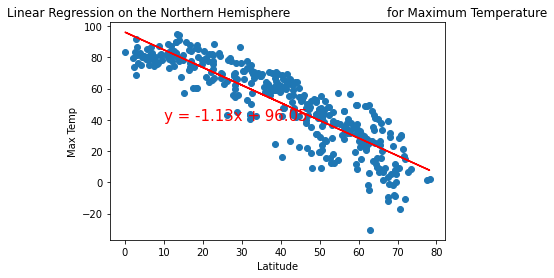

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

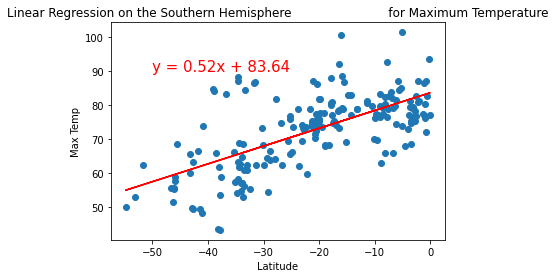

In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

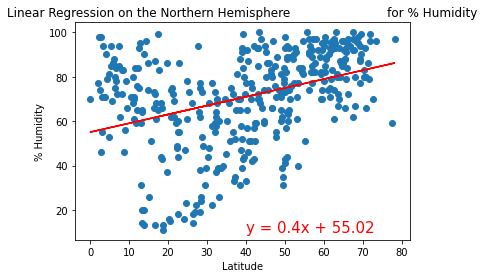

In [42]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

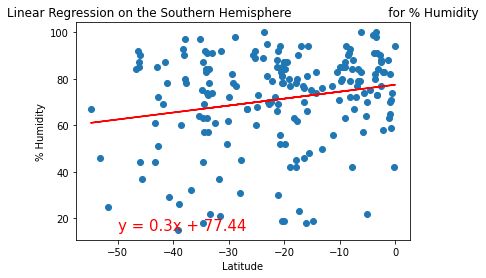

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

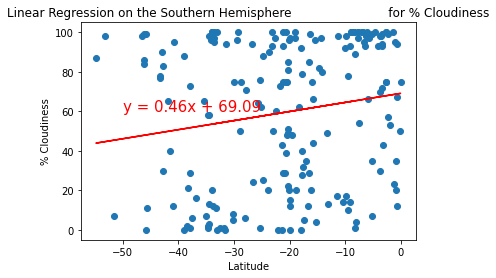

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

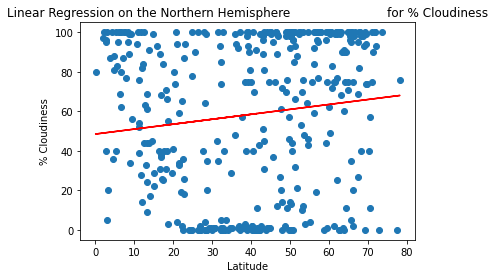

In [50]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-10,100))